In [4411]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster, neighbors, svm, metrics, preprocessing 

# StandardScaler para normalizar os dados
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# train_test_split é utilizada para fazer a divisão entre os dados para treinamento e teste
from sklearn.model_selection import train_test_split

# f1_score e ConfusionMatrix.classifier geram métricas para a avaliação dos modelos
from sklearn.metrics import f1_score
from yellowbrick.classifier import ConfusionMatrix

# Import da base de dados
#D:/Downloads/akc-data.csv
base_akc = pd.read_csv("https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv")

# Definindo seed
SEED = 42 # get that reference!


In [4412]:
# Exibindo base de dados original
base_akc.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)
# Exibindo base de dados original
pd.DataFrame(base_akc)

,Name,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


# 1.1 - Pré Processamento de Dados 

### Informaçoes do banco de dados

In [4413]:
print(f"Quantidade de linhas: {base_akc.shape[0]}")
print(f"Quantidade de colunas: {base_akc.shape[1]}")

Quantidade de linhas: 277
Quantidade de colunas: 21


### Limpeza de dados



#### -> Filtro inicial 


In [4414]:

# Os atributos abaixo foram removidos por serem redundantes e terem alta correlação com outras colunas de dados
base_akc = base_akc.drop('shedding_category', axis = 1)
base_akc = base_akc.drop('demeanor_category', axis = 1)
base_akc = base_akc.drop('grooming_frequency_category', axis = 1)
base_akc = base_akc.drop('energy_level_category', axis = 1)
base_akc = base_akc.drop('trainability_category', axis = 1)


# Os atributos Name e description foram removidos porque eram textuais e não tem relação/ influência no restante dos dados.
base_akc = base_akc.drop('Name', axis = 1)
base_akc = base_akc.drop('description', axis = 1)


Foi procurado por atributos que fossem redundantes ou únicos restar somente os atributos mais importantes.
A coluna "temperament" e a coluna "group" foram deixadas apesar de serem textuais pois foi julgado que elas poderão ajudar no diferenciamento dos grupos 

#### -> Verificando valores com 0


In [4415]:
# Verificação de valores 0s
valores_zero = base_akc == 0.0
valores_zero.sum()

temperament                 0
popularity                  0
min_height                  0
max_height                  0
min_weight                  1
max_weight                  1
min_expectancy              1
max_expectancy              1
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

In [4416]:
#ow_to_replace0 = valores_zero.iloc[0]
#row_to_replace1 = valores_zero.iloc[1]

# Substituindo os valores zero (0.0000) por NaN para poder preencher com a média posteriormente
#base_akc.loc[row_to_replace1.name, 'min_expectancy'] = float('NaN')
#base_akc.loc[row_to_replace1.name, 'max_expectancy'] = float('NaN')

# Substituindo os valores zero (0.0000) por NaN para poder preencher com a média posteriormente
#base_akc.loc[row_to_replace0.name, 'min_weight'] = float('NaN')
#base_akc.loc[row_to_replace0.name, 'max_weight'] = float('NaN')

# Colunas onde você deseja substituir os valores 0 por NaN
columns_to_replace_zeros = ['min_expectancy', 'max_expectancy', 'min_weight', 'max_weight']

# Substituindo os valores 0 por NaN em todas as colunas especificadas
for column in columns_to_replace_zeros:
    base_akc[column] = base_akc[column].replace(0, np.nan)

In [4417]:
# Verificação de valores 0s
valores_zero = base_akc == 0.0
valores_zero.sum()

temperament                 0
popularity                  0
min_height                  0
max_height                  0
min_weight                  0
max_weight                  0
min_expectancy              0
max_expectancy              0
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

Por ter apenas alguns atributos com 0s, considerando que o 0 não é um valor que normal para se ter como dados nesses atributos, trnasformei os valores 0s em valores nulos para trata-los todos juntos posteriormente.

#### -> Verificando valores nulos

In [4418]:
# Verificando se há valores vazios em cada coluna
missing_values = base_akc.isnull().sum()

# Exibindo as colunas com valores vazios
print("Colunas com valores vazios:")
print(missing_values)

Colunas com valores vazios:
temperament                  1
popularity                  79
min_height                   0
max_height                   0
min_weight                   3
max_weight                   3
min_expectancy               4
max_expectancy               4
group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64


In [4419]:
# O atributo popularity foi removido pela quantidade de dados nulos 
base_akc = base_akc.drop('popularity', axis = 1)

A coluna "Popularity" contém aproxiamdamente 29% de dados nulos, e para evitar impacto negativo nos resultados ela foi desconsiderada.



##### -> Coluna 'temperament'

In [4420]:
# Exibindo a linha em que 'temperament' é nulo
base_akc[base_akc['temperament'].isna()]

,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
236,NaN,57.15,67.31,22.679619,29.483504,12.0,15.0,Foundation Stock Service,0.2,0.4,0.8,0.4,1.0


Visto que a coluna contém apenas 1 valor nulo escolhi preencher manualmente utilizando o site "https://dogtime.com/dog-breeds/slovakian-wirehaired-pointer" o qual define o temperamento como "lively, happy, loyal and affectionate". A partir da descrição dada pelo site listei a frequencia de todas as palavras da coluna 'temperament' para buscar por sinonimos que condizem com as palavras dadas no site, evitando utilizar linguagem/maneira de descrição diferente da do banco de dados para a substituição do valor nulo.

In [4421]:
import pandas as pd


# Dividindo os valores da coluna "temperament" em palavras individuais e contando a frequência
temperament_counts = {}
for temperament in base_akc['temperament'].dropna():
    words = temperament.split(', ')
    for word in words:
        word = word.strip()  # Remove espaços em branco adicionais
        temperament_counts[word] = temperament_counts.get(word, 0) + 1

# Ordenando as palavras por frequência em ordem decrescente
temperament_counts_sorted = sorted(temperament_counts.items(), key=lambda x: x[1], reverse=True)

# Imprimindo as palavras da coluna "temperament" e suas frequências em ordem decrescente
print("Frequência das palavras na coluna 'temperament' (em ordem decrescente):")
for word, count in temperament_counts_sorted:
    print(f"'{word}': {count}")

Frequência das palavras na coluna 'temperament' (em ordem decrescente):
'Friendly': 50
'Intelligent': 49
'Loyal': 48
'Alert': 40
'Affectionate': 39
'Smart': 35
'Playful': 23
'Independent': 23
'Confident': 20
'Courageous': 20
'Gentle': 18
'Energetic': 14
'Lively': 14
'Calm': 14
'Devoted': 14
'Charming': 13
'Dignified': 12
'Bright': 12
'Active': 12
'Outgoing': 12
'Fearless': 10
'Happy': 9
'Curious': 8
'Good-Natured': 8
'Agile': 8
'Versatile': 8
'Spirited': 8
'Brave': 8
'Patient': 7
'Inquisitive': 7
'Bold': 7
'Even-Tempered': 7
'Noble': 7
'Sociable': 6
'Determined': 6
'Faithful': 6
'Watchful': 6
'Sensitive': 6
'Proud': 6
'Clever': 5
'Self-Confident': 5
'Trainable': 5
'Fun-Loving': 5
'Enthusiastic': 5
'Loving': 5
'Family-Oriented': 5
'Sweet': 4
'Eager': 4
'Reserved': 4
'Cheerful': 4
'Merry': 4
'Obedient': 4
'Hardworking': 4
'Amusing': 4
'Adaptable': 4
'Mischievous': 4
'Graceful': 4
'Attentive': 4
'Mellow': 3
'Easy-Going': 3
'Comical': 3
'Reserved with Strangers': 3
'Powerful': 3
'Strong-Wi

O atributo 'temperament' foi definido como "Affectionate, Loyal, Happy".

In [4422]:
base_akc['temperament'] = base_akc['temperament'].fillna('Affectionate, Loyal, Happy')

##### -> Preenchendo valores nulos > 5% dos valores totais

 Para colunas numéricas que contém valores nulos maior que 5% (13,8) da quantidade de dados total foi definido que os valores nulos seriam preenchidos com a média da dos dados totais do atributo.  

In [4423]:
# Calcular as médias
shedding_mean = base_akc['shedding_value'].mean()
trainability_mean = base_akc['trainability_value'].mean()
demeanor_mean = base_akc['demeanor_value'].mean()

# Preencher os valores nulos com as médias calculadas em todo o DataFrame
base_akc.fillna({'shedding_value': shedding_mean, 'trainability_value': trainability_mean, 'demeanor_value': demeanor_mean}, inplace=True)

- Verificando valores nulos restantes

In [4424]:
# Verificando se há valores vazios em cada coluna
missing_values = base_akc.isnull().sum()

# Exibindo as colunas com valores vazios
print("Colunas com valores vazios:")
print(missing_values)

Colunas com valores vazios:
temperament                 0
min_height                  0
max_height                  0
min_weight                  3
max_weight                  3
min_expectancy              4
max_expectancy              4
group                       0
grooming_frequency_value    7
shedding_value              0
energy_level_value          6
trainability_value          0
demeanor_value              0
dtype: int64


#### -> Colunas 'min_weight' e 'max_weight'

In [4425]:
# Exibindo as linhas em que ambos os valores de 'min_weight' e 'max_weight' são nulos
base_akc[base_akc[['min_weight','max_weight']].isnull().all(axis= 1)]

,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
16,"Loyal, Alert, Intelligent",43.18,50.80,NaN,NaN,10.0,13.0,Foundation Stock Service,0.4,0.800000,0.8,1.0,0.6
65,"Affectionate, Intelligent, Majestic",59.69,69.85,NaN,NaN,9.0,12.0,Working Group,0.2,0.400000,0.8,0.6,0.6
244,"Sociable, Patient, Docile",55.88,68.58,NaN,NaN,10.0,12.0,Sporting Group,0.4,0.529183,0.8,0.6,0.6


- Verificando correlações:


In [4426]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# max_weight
correlations_max = colunas.drop(columns="max_weight").corrwith(base_akc["max_weight"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'max_weight':")
print(correlations_max)

#  min_weight
correlations_min = colunas.drop(columns="min_weight").corrwith(base_akc["min_weight"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'min_weight':")
print(correlations_min)




Correlação: 'max_weight':
min_weight                  0.947116
max_height                  0.816879
min_height                  0.802855
max_expectancy              0.604172
min_expectancy              0.584678
shedding_value              0.274627
demeanor_value              0.249942
grooming_frequency_value    0.123211
energy_level_value          0.074074
trainability_value          0.069349
dtype: float64

Correlação: 'min_weight':
max_weight                  0.947116
min_height                  0.826045
max_height                  0.803600
max_expectancy              0.642030
min_expectancy              0.620639
shedding_value              0.278018
demeanor_value              0.255506
grooming_frequency_value    0.145948
trainability_value          0.122592
energy_level_value          0.069667
dtype: float64


Foi verificado alta correlação entre 'min_weight'/'max_weight' com os atributos 'min_height'/max_height'. Sabendo dessa alta correlação para cada linha com dado min/max weight nulo procurei a linha com maior proximidade de max_height e min_height e substitui os valores de max_wieght e min_weight delas na coluna dos valores nulos.

In [4427]:
#coll_null = base_akc[base_akc['min_weight'].isnull() & base_akc['max_weight'].isnull()]

In [4428]:

# Criar um DataFrame apenas com linhas onde 'min_weight' e 'max_weight' são nulos
coll_null = base_akc[base_akc['min_weight'].isnull() & base_akc['max_weight'].isnull()]

# Iterar sobre cada linha com valores nulos
for index, row in coll_null.iterrows():
    # Encontrar o índice da linha mais próxima com valores não nulos para 'min_height' e 'max_height'
    closest_row_index = base_akc[~base_akc['min_weight'].isnull() & ~base_akc['max_weight'].isnull()] \
        .apply(lambda x: np.linalg.norm([row['min_height'] - x['min_height'], row['max_height'] - x['max_height']]), axis=1) \
        .idxmin()
    
    # Preencher os valores nulos de 'min_weight' e 'max_weight' com os valores da linha mais próxima
    base_akc.at[index, 'min_weight'] = base_akc.at[closest_row_index, 'min_weight']
    base_akc.at[index, 'max_weight'] = base_akc.at[closest_row_index, 'max_weight']


In [4429]:
#knn = neighbors.KNeighborsClassifier(n_neighbors= 3, algorithm= 'auto')
#knn.fit(trainSample, trainTarget)
#resultKNN = knn.predict(testSample)

In [4430]:
# Índices das linhas que tem o max e min weight nulos
indices_das_linhas = [16, 65, 244]

# Imprimindo as linhas específicas em formato de tabela
print(base_akc.loc[indices_das_linhas].to_string(index=False))


                        temperament  min_height  max_height  min_weight  max_weight  min_expectancy  max_expectancy                    group  grooming_frequency_value  shedding_value  energy_level_value  trainability_value  demeanor_value
          Loyal, Alert, Intelligent       43.18       50.80   15.875733   22.679619            10.0            13.0 Foundation Stock Service                       0.4        0.800000                 0.8                 1.0             0.6
Affectionate, Intelligent, Majestic       59.69       69.85   31.751466   49.895161             9.0            12.0            Working Group                       0.2        0.400000                 0.8                 0.6             0.6
          Sociable, Patient, Docile       55.88       68.58   68.038855   90.718474            10.0            12.0           Sporting Group                       0.4        0.529183                 0.8                 0.6             0.6


In [4431]:
print(f"Quantidade de linhas: {base_akc.shape[0]}")
print(f"Quantidade de colunas: {base_akc.shape[1]}")

Quantidade de linhas: 277
Quantidade de colunas: 13


#### -> Colunas 'min_expectancy' e 'max_expectancy'

In [4432]:
# Exibindo as linhas em que ambos os valores de 'min_expectancy' e 'max_expectancy' são nulos
base_akc[base_akc[['min_expectancy','max_expectancy']].isnull().all(axis= 1)]

,temperament,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
55,"Friendly, Smart, Willing to Please",46.990,58.42,18.143695,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,1.0,0.624506,0.620635
67,"Loyal, Independent, Reserved with Strangers",45.085,49.53,13.607771,24.947580,NaN,NaN,Foundation Stock Service,0.2,0.6,0.6,1.000000,0.600000
71,"Independent, Courageous, Self-Confident",64.770,69.85,39.916129,49.895161,NaN,NaN,Foundation Stock Service,0.2,0.6,0.4,0.400000,0.200000
209,"Affectionate, Active, Enthusiastic",38.100,53.34,6.803886,13.607771,NaN,NaN,Herding Group,0.4,0.6,0.8,0.600000,0.400000


- Verificando correlações com outras colunas:

In [4433]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# max_expectancy
correlations_max = colunas.drop(columns="max_expectancy").corrwith(base_akc["max_expectancy"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'max_expectancy':")
print(correlations_max)

#  min_expectancy
correlations_min = colunas.drop(columns="min_expectancy").corrwith(base_akc["min_expectancy"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'min_expectancy':")
print(correlations_min)




Correlação: 'max_expectancy':
min_expectancy              0.722570
min_weight                  0.637813
max_weight                  0.604389
min_height                  0.521806
max_height                  0.512377
shedding_value              0.371127
demeanor_value              0.146936
grooming_frequency_value    0.136458
trainability_value          0.096873
energy_level_value          0.028560
dtype: float64

Correlação: 'min_expectancy':
max_expectancy              0.722570
min_weight                  0.614189
max_weight                  0.583044
min_height                  0.507903
max_height                  0.475330
shedding_value              0.254702
demeanor_value              0.161169
trainability_value          0.093219
grooming_frequency_value    0.027656
energy_level_value          0.012808
dtype: float64


In [4434]:

print(f"Informações coluna {'min_expectancy'}: \n\tMédia: {base_akc['min_expectancy'].mean()} \n\tMediana: {base_akc['min_expectancy'].median()} \n\tModa: {base_akc['min_expectancy'].mode()[0]} \n\tDesvio Padrão: {base_akc['min_expectancy'].std()}\n")

print(f"Informações coluna {'max_expectancy'}: \n\tMédia: {base_akc['max_expectancy'].mean()} \n\tMediana: {base_akc['max_expectancy'].median()} \n\tModa: {base_akc['max_expectancy'].mode()[0]} \n\tDesvio Padrão: {base_akc['max_expectancy'].std()}\n")

Informações coluna min_expectancy: 
	Média: 11.347985347985349 
	Mediana: 12.0 
	Moda: 12.0 
	Desvio Padrão: 1.6868232760103863

Informações coluna max_expectancy: 
	Média: 13.882783882783883 
	Mediana: 14.0 
	Moda: 15.0 
	Desvio Padrão: 1.8373665260137269



Os atributos 'min_expectancy' e 'max_expectancy' não tem uma correlação tão forte com outros atributos, dessa forma calculei a media moda e mediana dos dois atributos para decidir como seguir. O resultados dos dados não mostram grande desvio padrão entre os dados, sugerindo que a veriação deles não é tão grande. Sendo assim optei por preencher os valores nulos com a média dos dados.



In [4435]:
base_akc['min_expectancy'] = base_akc['min_expectancy'].fillna(base_akc['min_expectancy'].median())
base_akc['max_expectancy'] = base_akc['max_expectancy'].fillna(base_akc['max_expectancy'].median())

#### -> Coluna 'grooming_frequency_value'

- Verificando correlação:


In [4436]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# grooming_frequency_value
correlations = colunas.drop(columns="grooming_frequency_value").corrwith(base_akc["grooming_frequency_value"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'grooming_frequency_value':")
print(correlations)



Correlação: 'grooming_frequency_value':
max_height            0.244199
min_height            0.186637
energy_level_value    0.151441
min_weight            0.147378
max_expectancy        0.134571
max_weight            0.126555
demeanor_value        0.109984
trainability_value    0.096439
shedding_value        0.068787
min_expectancy        0.022403
dtype: float64


In [4437]:
print(f"Informações coluna {'grooming_frequency_value'}: \n\tMédia: {base_akc['grooming_frequency_value'].mean()} \n\tMediana: {base_akc['grooming_frequency_value'].median()} \n\tModa: {base_akc['grooming_frequency_value'].mode()[0]} \n\tDesvio Padrão: {base_akc['grooming_frequency_value'].std()}\n")


Informações coluna grooming_frequency_value: 
	Média: 0.42592592592592593 
	Mediana: 0.4 
	Moda: 0.4 
	Desvio Padrão: 0.19830619670722646



- Pela baixa correlação com todas os atributos verifiquei a media, moda, mediana e std da coluna. Após tirar essas estatisticas optei por escolher a moda para substituir os valores nulos(NaN) já que os dados de 'grooming_frequency_value' variam apenas de 0 - 1 e que os resultados não mostram grande disperção. 


In [4438]:
base_akc['grooming_frequency_value'] = base_akc['grooming_frequency_value'].fillna(base_akc['grooming_frequency_value'].median())

#### -> Coluna 'energy_level_value'

- Verificando correlações:

In [4439]:
# Limitando busca apenas para valores numéricos
colunas = base_akc.select_dtypes(include=['float64', 'int64']) 

# energy_level_value
correlations = colunas.drop(columns="energy_level_value").corrwith(base_akc["energy_level_value"]).abs().sort_values(ascending=False)
print("\nCorrelação: 'energy_level_value':")
print(correlations)


Correlação: 'energy_level_value':
max_height                  0.198560
min_height                  0.174194
shedding_value              0.167375
grooming_frequency_value    0.149574
trainability_value          0.110503
max_weight                  0.064367
min_weight                  0.058074
max_expectancy              0.028107
min_expectancy              0.012189
demeanor_value              0.002875
dtype: float64


In [4440]:
print(f"Informações coluna {'energy_level_value'}: \n\tMédia: {base_akc['energy_level_value'].mean()} \n\tMediana: {base_akc['energy_level_value'].median()} \n\tModa: {base_akc['grooming_frequency_value'].mode()[0]} \n\tDesvio Padrão: {base_akc['energy_level_value'].std()}\n")


Informações coluna energy_level_value: 
	Média: 0.7129151291512915 
	Mediana: 0.6 
	Moda: 0.4 
	Desvio Padrão: 0.16892686394666076



- Pela baixa correlação com todas os atributos verifiquei a media, moda, mediana e std da coluna. Após tirar essas estatisticas optei por escolher a média para substituir os valores nulos(NaN).

In [4441]:
base_akc['energy_level_value'] = base_akc['energy_level_value'].fillna(base_akc['energy_level_value'].mode()[0])

#### -> Filtragem Completa

In [4442]:
# Verificação de valores nulos 
base_akc.isnull().sum()

temperament                 0
min_height                  0
max_height                  0
min_weight                  0
max_weight                  0
min_expectancy              0
max_expectancy              0
group                       0
grooming_frequency_value    0
shedding_value              0
energy_level_value          0
trainability_value          0
demeanor_value              0
dtype: int64

### Redução de Dimensionalidade Manual


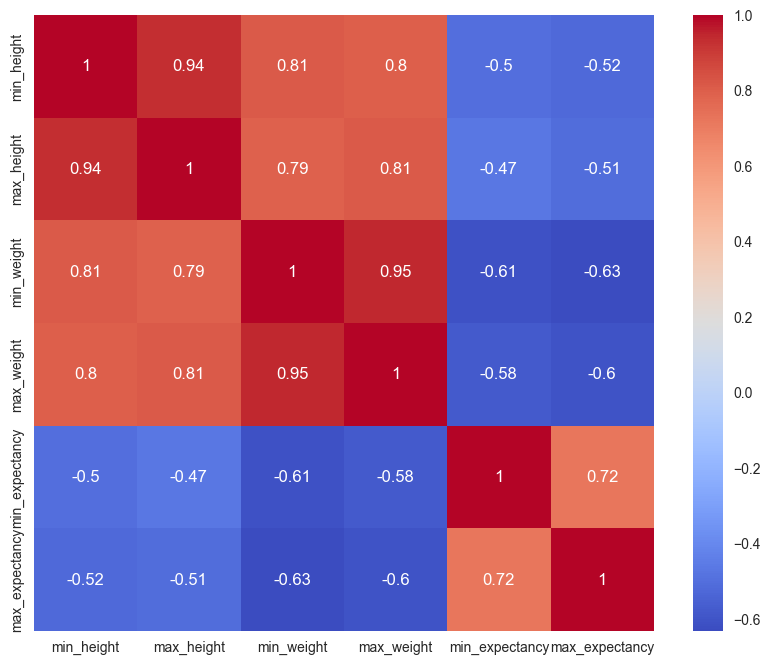

In [4443]:
# Atributos com maior taxa de correlação
correlation_matrix = (base_akc.iloc[:, 1:7]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [4444]:
# Cópia dos atributos antes da agregação para usar no PCA
preagr_base_ack = base_akc.copy()

#### -> Colunas 'min_weight', 'max_weight', 'min_height', 'max_heigt'

Será feita a redução da dimensionalidade das colunas ("min_weight" e "max_weight") e ("min_height" e "max_heigt") devido a alta correlação entre os dois atributos (foi mostrado anteriormente na parte "Limpeza de Dados" e no gráfico acima). Sendo assim será criado um novo atributo - average_weight e average_height - composto pela média do minimo e maximo de cada linha.

In [4445]:

# Criar uma cópia do DataFrame para armazenar os resultados da agregação
base_akc_aggregated = base_akc.copy()

# Realizar a agregação das colunas min_height e max_height pela média
base_akc_aggregated['average_height'] = (base_akc['min_height'] + base_akc['max_height']) / 2

# Realizar a agregação das colunas min_weight e max_weight pela média
base_akc_aggregated['average_weight'] = (base_akc['min_weight'] + base_akc['max_weight']) / 2

# Drop das colunas originais min_height, max_height, min_weight e max_weight
base_akc_aggregated.drop(['min_height', 'max_height', 'min_weight', 'max_weight'], axis=1, inplace=True)

In [4446]:
pd.DataFrame(base_akc_aggregated)
base_akc_aggregated.head(3)

,temperament,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,average_height,average_weight
0,"Confident, Famously Funny, Fearless",12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0,26.035,3.855535
1,"Dignified, Profoundly Loyal, Aristocratic",12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2,66.040,24.947580
2,"Friendly, Clever, Courageous",11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8,58.420,27.215542


#### -> Coluna 'temperament'

Como este atributo consiste em texto e contém múltiplas palavras, optei por excluir esta coluna. Além de demandar recursos computacionais significativos, não encontrei uma maneira imparcial e objetiva de dividir todas as palavras em grupos menores.


In [4447]:
base_akc_aggregated.drop(columns=['temperament'], inplace= True)


#### -> Coluna 'group'

In [4448]:
## FAZER -> TRANSFORMAR EM NUMEROS

#### -> Matriz de Correlação após redução de dimensionamento manual

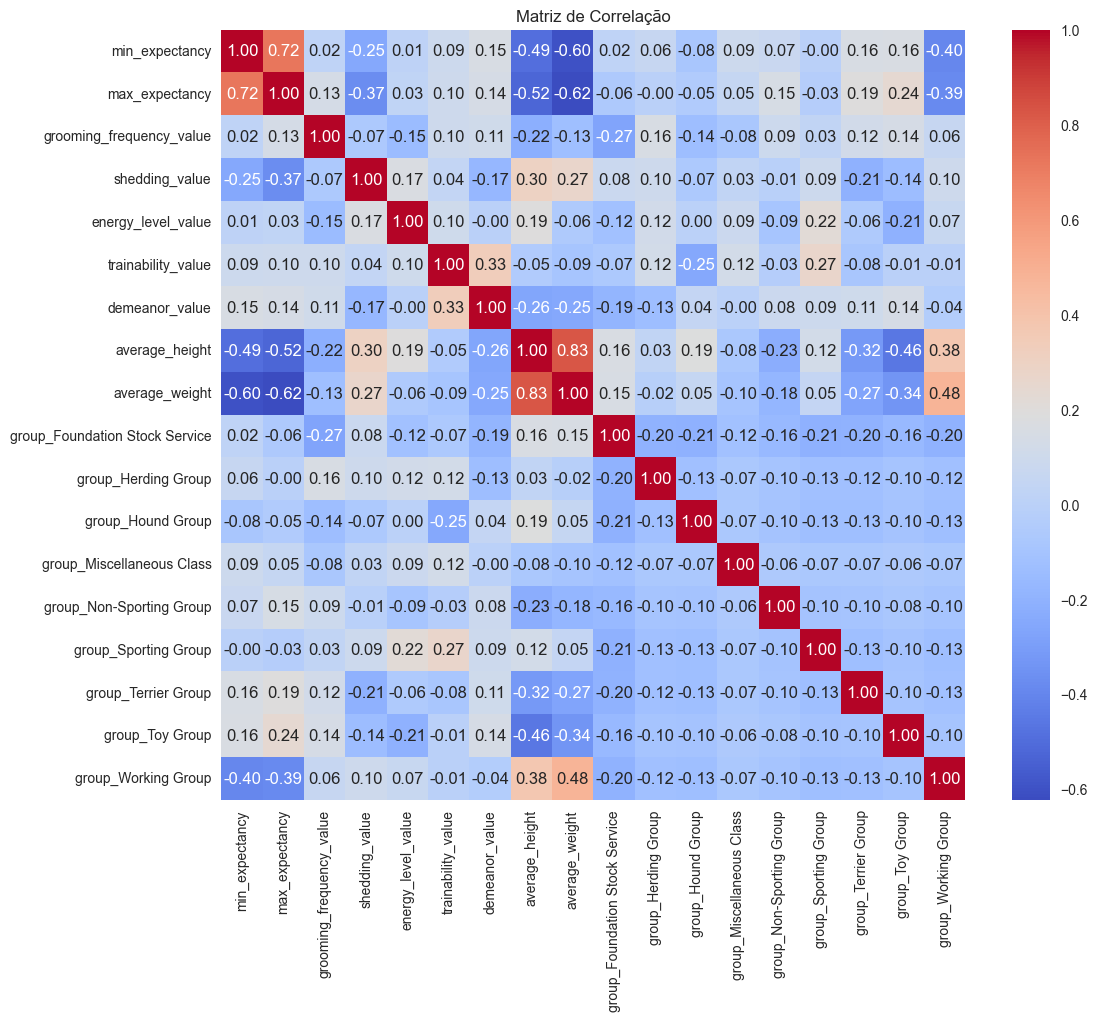

In [4449]:
# Codificação de variáveis dummy
encoded_data = pd.get_dummies(base_akc_aggregated)

# Calculando a matriz de correlação
correlation_matrix = encoded_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


### Redução de Dimensionalidade (PCA)

- Após a limpeza de dados nulos ou 0s e da redução manual restaram esses atributos:



In [4450]:
for column in base_akc_aggregated.columns:
    print(column)

min_expectancy
max_expectancy
group
grooming_frequency_value
shedding_value
energy_level_value
trainability_value
demeanor_value
average_height
average_weight


In [4451]:
# Atributos
features = base_akc.drop('group', axis= 1).values

# Rótulos
target = base_akc.iloc[:, 4]

In [4452]:
# Cópia dos atributos antes da agregação para usar no PCA
preagr_base_ack = base_akc_aggregated.copy()

# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(preagr_base_ack.drop('group', axis= 1))

# Especificando o número de componetes
n_components = 7  # Numero foi escolhido pois o gráfico de variancia acumulada começou e estabilizar após ele


# Inicializando e ajustando o modelo PCA aos dados normalizados
pca = PCA(n_components = n_components)
pca.fit(features_scaled)

# Transformando os dados para o espaço de componentes principais
features_pca = pca.transform(features_scaled)

print("Dimensões dos dados após o PCA:", features_pca.shape)

Dimensões dos dados após o PCA: (277, 7)


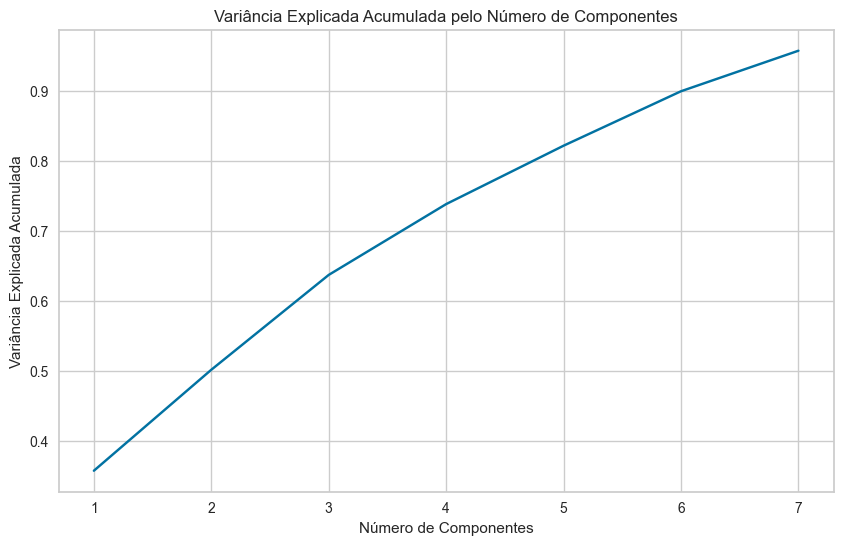

In [4453]:

# Plotar o gráfico da variância explicada acumulada em relação ao número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo Número de Componentes')
plt.grid(True)
plt.show()

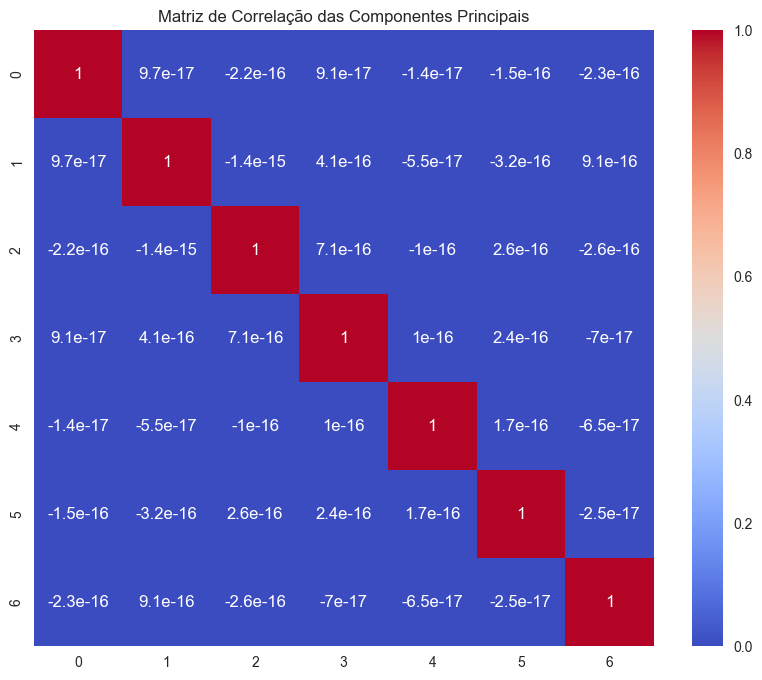

In [4454]:
# Calculando a matriz de correlação das componentes principais
correlation_matrix_pca = pd.DataFrame(features_pca).corr()

# Plotando o heatmap da matriz de correlação das componentes principais
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Componentes Principais')
plt.show()

In [4455]:
# Lib necessárias para o PCA
from sklearn.decomposition import PCA

In [4456]:
# Normalizando os dados
scaler = StandardScaler()
features_scaled = scaler.fit_transform(preagr_base_ack.drop('group', axis= 1))

In [4457]:
# Especificando o número de componentes desejados
n_components = 6 
# obs: Foram testados diversos valores que geravam redução de dimensionalidade, o valor 6 foi o que apresentou os melhores resultados comsiderando o quanto ele reduz a base

# Inicializando e ajustando o modelo PCA aos dados normalizados
pca = PCA(n_components = n_components)
pca.fit(features_scaled)

# Transformando os dados para o espaço de componentes principais
features_pca = pca.transform(features_scaled)

In [4458]:
# Dividi os dados em conjuntos de treinamento e teste usando a base com agregação manual
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = SEED, stratify = target )

# Dividi os dados em conjuntos de treinamento e teste usando a base com PCA
features_train_pca, features_test_pca, target_train_pca, target_test_pca = train_test_split(features_pca, target, test_size = 0.2, random_state = SEED, stratify = target)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# Import do modelo de Árvore de Decisão que será utilizado
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inicializa o classificador Random Forest para base com agregação manual
random_forest = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Inicializa o classificador Random Forest para base com PCA
random_forest_pca = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Treina os classificadores
random_forest.fit(features_train, target_train)

random_forest_pca.fit(features_train_pca, target_train_pca)

# Faz previsões no conjunto de teste
target_pred = random_forest.predict(features_test)

target_pred_pca = random_forest_pca.predict(features_test_pca)

In [ ]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---Agregação Manual---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test, target_pred, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test, target_pred, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test, target_pred, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm = ConfusionMatrix(random_forest)
cm.fit(features_train, target_train)
cm.score(features_test, target_test);

In [ ]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---PCA---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test_pca, target_pred_pca, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test_pca, target_pred_pca, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test_pca, target_pred_pca, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm_pca = ConfusionMatrix(random_forest_pca)
cm_pca.fit(features_train_pca, target_train_pca)
cm_pca.score(features_test_pca, target_test_pca);

Conclusões
Desempenho Geral:
O F1-score médio ponderado é uma métrica útil para avaliar o desempenho geral do modelo. No caso do conjunto de dados com agrupamento manual, o F1-score médio ponderado é de aproximadamente 0.43, enquanto no conjunto de dados com PCA é de cerca de 0.39. Isso sugere que o modelo treinado com a base de dados com agrupamento manual teve um desempenho ligeiramente melhor em comparação com o modelo treinado com a base de dados com PCA.

Equilíbrio de Classes:
A matriz de confusão também fornece insights sobre como o modelo está se saindo na classificação de cada classe. Observando as células fora da diagonal principal (que indicam classificações incorretas), podemos ver como o modelo está distribuindo incorretamente as previsões entre as diferentes classes. Percebe-se também que o modelo é tendencioso, pois sempre tenta classificar os objetos como pertencentes as classes com maior população. Isso ocorre pois a base de dados original estava desbalanceada e utilizou-se amostragem estratificada para divisão dos conjuntos de treinameno e teste.

Impacto do Pré-processamento:
O uso de PCA para redução de dimensionalidade pode ter impactado negativamente o desempenho do modelo. Embora o PCA reduza a dimensionalidade do conjunto de dados, ele também pode eliminar informações importantes, o que pode resultar em uma perda de desempenho do modelo.

Desbalanceamento e Tamanho do Conjunto de Dados Original:
O fato de o conjunto de dados original ser pequeno e desbalanceado influenciou significativamente o desempenho do modelo. Modelos de aprendizado de máquina tendem a ter dificuldades em lidar com conjuntos de dados pequenos e desbalanceados, o que pode resultar em desempenho inferior e viés em direção às classes majoritárias.

In [ ]:
#NAIVE BAYES
# Import do Naive Bayes Gaussiano, o modelo Gaussiano é preferido pois a base de dados é numérica e não textual
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Inicializando o modelo
gnb = GaussianNB()
gnb_pca = GaussianNB()


# Treinando os modelos no conjunto de treinamento
gnb.fit(features_train, target_train)
gnb_pca.fit(features_train_pca, target_train_pca)
   
# Fazendo previsões no conjunto de teste
target_pred = gnb.predict(features_test)
target_pred_pca = gnb_pca.predict(features_test_pca)

In [ ]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---Agregação Manual---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test, target_pred, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test, target_pred, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test, target_pred, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm = ConfusionMatrix(gnb)
cm.fit(features_train, target_train)
cm.score(features_test, target_test);

In [ ]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---PCA---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test_pca, target_pred_pca, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test_pca, target_pred_pca, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test_pca, target_pred_pca, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm_pca = ConfusionMatrix(gnb_pca)
cm_pca.fit(features_train_pca, target_train_pca)
cm_pca.score(features_test_pca, target_test_pca);

Conclusões
Desempenho Geral:
Novamente, observamos que o F1-score médio ponderado é uma métrica útil para avaliar o desempenho geral do modelo. No caso do conjunto de dados com agrupamento manual, o F1-score médio ponderado é de aproximadamente 0.28, enquanto no conjunto de dados com PCA é de cerca de 0.33. Neste caso, o modelo treinado com o conjunto de dados com PCA teve um desempenho ligeiramente melhor.

Possíveis Razões para o Desempenho:
É interessante notar que, ao contrário do modelo de Random Forest, o modelo de Naive Bayes obteve um desempenho ligeiramente melhor com o conjunto de dados com PCA. Isso pode ser devido à natureza simplificada e independente das características assumida pelo Naive Bayes, que pode ser mais compatível com as características extraídas após a redução de dimensionalidade pelo PCA. O PCA pode ter capturado melhor a estrutura subjacente dos dados para o Naive Bayes, tornando-o mais eficaz em comparação com o conjunto de dados original com agrupamento manual.

Efeito do Random State:
O random_state é um parâmetro que afeta a aleatoriedade no treinamento do modelo. Se o desempenho do modelo variar significativamente com diferentes valores de random_state, isso pode indicar que o modelo é sensível à inicialização aleatória e que os resultados podem não ser totalmente confiáveis. Para garantir a estabilidade dos resultados, é uma prática comum realizar múltiplas execuções do modelo com diferentes valores de random_state e, em seguida, relatar estatísticas resumidas sobre o desempenho. Portanto o resultado obtido pode ser anormal e se tratar de uma peculiaridade do random_state = 42 especificamente.

In [ ]:
#MPL
# Import do classificador Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier

In [ ]:
# Inicializando o modelo
mlp = MLPClassifier(hidden_layer_sizes= (128, 64, 32, 16), max_iter= 10000, random_state= SEED)
mlp_pca = MLPClassifier(hidden_layer_sizes= (128, 64, 32, 16), max_iter= 10000, random_state= SEED)

# # Treinando os modelos no conjunto de treinamento
mlp.fit(features_train, target_train)
mlp_pca.fit(features_train_pca, target_train_pca)

# Fazendo previsões no conjunto de teste
target_pred = mlp.predict(features_test)
target_pred_pca = mlp_pca.predict(features_test_pca)

In [ ]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---Agregação Manual---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test, target_pred, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test, target_pred, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test, target_pred, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm = ConfusionMatrix(mlp)
cm.fit(features_train, target_train)
cm.score(features_test, target_test);

In [ ]:
# Avaliação da precisão do modelo treinado com a base de agregação manual utilizando F1-score

print('---PCA---\n')

# Calcula o F1-score globalmente contando o total de verdadeiros positivos, falsos positivos e falsos negativos.
# Este método trata todas as predições como se fossem de uma única classe grande.
print("F1-score (Micro Average):", f1_score(target_test_pca, target_pred_pca, average= 'micro'), '\n')

# Calcula a média do F1-score de cada classe, sem considerar a proporção de cada classe.
# Trata todas as classes igualmente.
print("F1-score (Macro Average):", f1_score(target_test_pca, target_pred_pca, average= 'macro'), '\n')

# Calcula a média do F1-score de cada classe, ponderando pela quantidade de verdadeiros exemplos de cada classe.
# Dá mais importância às classes com mais exemplos.
print("F1-score (Weighted Average):", f1_score(target_test_pca, target_pred_pca, average= 'weighted'))

# Para melhor visualização, podemos gerar a matriz de confusão do modelo
cm_pca = ConfusionMatrix(mlp_pca)
cm_pca.fit(features_train_pca, target_train_pca)
cm_pca.score(features_test_pca, target_test_pca);

Conclusões
Desempenho Geral:
Novamente, observamos o F1-score médio ponderado. No caso do conjunto de dados com agrupamento manual, o F1-score médio ponderado é de aproximadamente 0.39, enquanto no conjunto de dados com PCA é de cerca de 0.29. O modelo treinado com o conjunto de dados com agrupamento manual teve um desempenho significativamente melhor.

Arquitetura da Rede Neural:
A escolha da arquitetura da rede neural, especificada pelo parâmetro hidden_layer_sizes, pode ter um impacto significativo no desempenho do modelo. No caso, a arquitetura escolhida é relativamente complexa, com quatro camadas ocultas e um número considerável de neurônios em cada camada. Essa complexidade pode ter permitido que o modelo capturasse melhor os padrões nos dados brutos do conjunto de dados com agrupamento manual, levando a um desempenho superior em comparação com o conjunto de dados com PCA.

Algoritmos Não-Supervisionados
KMeans

In [ ]:
# Import do modelo
from sklearn.cluster import KMeans

In [ ]:
# Criar o modelo K-means com 9 clusters
kmeans = KMeans(n_clusters=9)

# Treinar o modelo e atribuir cada amostra a um cluster
clusters = kmeans.fit_predict(features)

# Encontrar os rótulos únicos dos clusters
u_labels = np.unique(clusters)

# Configurar o tamanho dos símbolos para a dispersão dos pontos
plt.figure(figsize=(8, 6))

# Definir um mapa de cores para os clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(u_labels)))

# Iterar sobre cada cluster único encontrado
for i, color in zip(u_labels, colors):
    # Plotar os pontos pertencentes ao cluster atual com uma cor diferente
    plt.scatter(features[clusters == i, 0], features[clusters == i, 1], label=i, s=30, color=color)

# Adicionar uma legenda ao gráfico
plt.legend()

# Exibir o gráfico
plt.show()